#terminal commands

hifive fends -L genome/mm9.len --binned 100000 gen_part_fend

hifive hic-data gen_part_fend -X data/WT_100kb/raw_\*.mat interaction_reads.txt

hifive hic-project -f 25 -n 25 -j 100000 -q interaction_reads.txt hic_project.txt

hifive hic-normalize express -f 25 -w cis hiC_project.txt 

In [1]:
import hifive

In [2]:
hic=hifive.HiC("hiC_project.txt", 'r')

In [3]:
data = hic.cis_heatmap('chr13', 1000000, datatype='fend', arraytype='full', diagonalincluded=True)

Finding fend full array for chr13:1000000-120250001... Done


In [6]:
import numpy as np

In [44]:
raw = data[:, :, 0]
raw = raw + 1
expected = data[:, :, 1]
expected = expected + 1
enrichment = raw/expected
enrichment_log = np.log2(enrichment)

In [45]:
import matplotlib.pyplot as plt

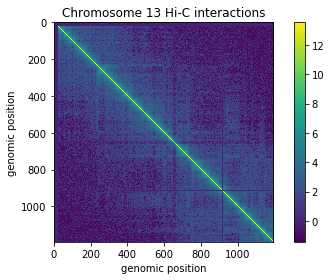

In [50]:
fig, ax = plt.subplots()
im = ax.imshow(enrichment_log)
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_title("Chromosome 13 Hi-C interactions")
ax.set_xlabel("genomic position")
ax.set_ylabel("genomic position")
fig.tight_layout()
plt.show()


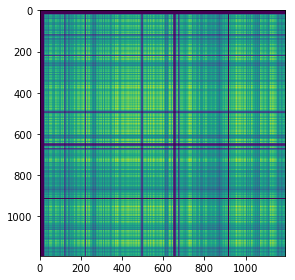

In [38]:
fig, ax = plt.subplots()
im = ax.imshow(data[:,:,1])
fig.tight_layout()
plt.show()


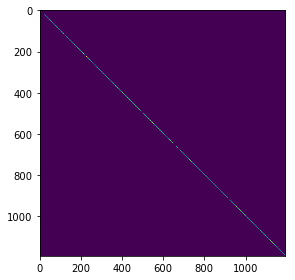

In [39]:
fig, ax = plt.subplots()
im = ax.imshow(data[:,:,0])
fig.tight_layout()
plt.show()


In [51]:
Comp = hifive.hic_domains.Compartment(hic, 100000, chroms=['chr13'], out_fname='tmp.hdf5')
Comp.write_eigen_scores('hic_comp.bed')

Finding expected full array for chr13:3000000-120300000... Done
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arr

In [52]:
X = Comp.positions['chr13']
Y = Comp.eigenv['chr13']

In [57]:
Y

array([-0.00520501+0.j, -0.00457767+0.j,  0.00061664+0.j, ...,
       -0.03419808+0.j, -0.01588152+0.j,  0.00623822+0.j], dtype=complex64)

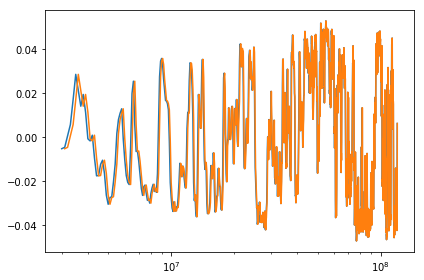

In [68]:
fig, ax = plt.subplots()
ax.plot(X,Y)
ax.set_xscale("log")
fig.tight_layout()
plt.show()

#terminal commands
bedtools intersect -a data/WT_fpkm.bed -b pos_comp.bed -f 0.5 -wa > pos_overlap
bedtools intersect -a data/WT_fpkm.bed -b neg_comp.bed -f 0.5 -wa > neg_overlap

In [82]:
f1 = open("pos_overlap")
f1 = f1.readlines()
f2 = open("neg_overlap")
f2 = f2.readlines()

pos = []
neg = []
for line in f1:
    line = line.split()
    pos.append(float(line[-1]))
for line in f2:
    line = line.split()
    neg.append(float(line[-1]))

In [95]:
pos_log = np.log(np.asarray(pos) + 1)
neg_log = np.log(np.asarray(neg) + 1)

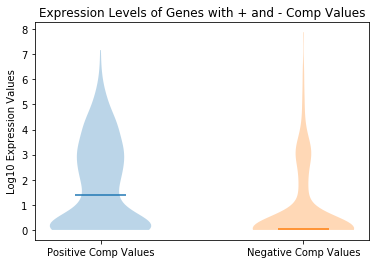

In [132]:
fig, ax = plt.subplots()
ax.violinplot(pos_log, positions=[0], showmeans=False, showmedians=True, showextrema=False)
ax.violinplot(neg_log, positions=[1], showmeans=False, showmedians=True, showextrema=False)
ax.set_xticks([0, 1])
ax.set_xticklabels(["Positive Comp Values", "Negative Comp Values"])
ax.set_ylabel("Log10 Expression Values")
ax.set_title("Expression Levels of Genes with + and - Comp Values")
plt.show()

In [117]:
import pyBigWig

[None]

In [120]:
pos_bw = []
neg_bw = []
bw = pyBigWig.open('data/WT_H3K27me3.bw')
for gene in f1:
    line = gene.split()
    coord1 = int(line[1])
    coord2 = int(line[2])
    pos_bw.append(bw.stats('chr13', coord1, coord2, type='sum'))
for gene in f2:
    line = gene.split()
    coord1 = int(line[1])
    coord2 = int(line[2])
    neg_bw.append(bw.stats('chr13', coord1, coord2, type='sum'))

In [121]:
pos_bw_flat = []
neg_bw_flat = []
for sublist in pos_bw:
    for item in sublist:
        pos_bw_flat.append(item)
for sublist in neg_bw:
    for item in sublist:
        neg_bw_flat.append(item)
[0 if x is None else x for x in pos_bw_flat]
[0 if x is None else x for x in neg_bw_flat]

[7.479450583457947,
 5.271998167037964,
 3.489296555519104,
 2.4484455585479736,
 3.7948414087295532,
 9.213294625282288,
 1.1952041387557983,
 2.105030655860901,
 3.7683080434799194,
 2.0,
 2.0,
 1.0,
 3.0,
 4.162608742713928,
 1661.0,
 1.0,
 4.6395652294158936,
 4.814361333847046,
 7.535989165306091,
 8.810202360153198,
 4.377156496047974,
 101.0,
 683.0,
 581.0,
 957.0,
 1042.0,
 1179.0,
 268.0,
 168.0,
 959.0,
 330.0,
 694.0,
 832.0,
 326.0,
 295.0,
 542.0,
 284.0,
 200.0,
 172.0,
 690.0,
 413.0,
 404.0,
 564.0,
 581.0,
 151.0,
 256.0,
 3.310116410255432,
 12.783918738365173,
 6.70252799987793,
 7822.0,
 6.933165073394775,
 3.2804877758026123,
 3.3828577995300293,
 3.2018537521362305,
 8.39748239517212,
 6.188507676124573,
 2.875379204750061,
 6.110118985176086,
 7.75848650932312,
 4.55949342250824,
 6.044349551200867,
 7.0419347286224365,
 6.979491353034973,
 5.659203052520752,
 6.43720281124115,
 6.909906387329102,
 8.477882385253906,
 4.938566446304321,
 2.4035874605178833,
 6.4

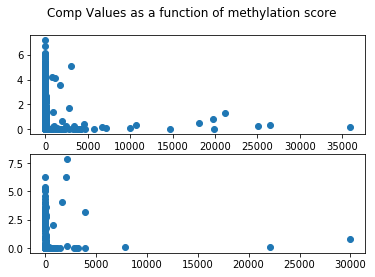

In [134]:
fig, ax = plt.subplots(2)
fig.suptitle("Comp Values as a function of methylation score")
ax[0].scatter(pos_bw_flat, pos_log) #fpkm expression of genes with comp values that are positive 50% of the time or more vs H3K27me
ax[1].scatter(neg_bw_flat, neg_log)
plt.tight_layout
plt.show()

# might more useful to compare positive comp values vs all comp values 

In [ ]:
#Radhika function f
def exp_rep(overlap_file):
    '''Gets bw value for each gene based on its coordinates
    INPUT: overlap_file: overlap file for positive or negative comp values
    OUTPUT: bw_final: list of bw values for each gene '''
    # Gets bw value for each gene based on its coordinates
    bw = pyBigWig.open('data/WT_H3K27me3.bw')
    bw_list = []
    for gene in overlap_file:
        line = gene.split()
        coord1 = int(line[1])
        coord2 = int(line[2])
        bw_list.append(bw.stats('chr13', coord1, coord2, type='sum'))
    # Flattens bw list
    bw_final = []
    for sublist in bw_list:
        for item in sublist:
            bw_final.append(item) 
    # Replaces None with 0 in bw flattened list        
    [0 if x is None else x for x in bw_final]
    return bw_final